# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: 315072397

# Details Student 2: 314916974


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
#!pip install wn
#!python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\amitp\Downloads\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

# Data cleaning preprocess, Train & Test

In [11]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

### Analysing Train Data Frame: Male  to Female ratio

Text(0, 10, '573')

Text(0, 10, '177')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, 'm'), Text(1, 0, 'f')])

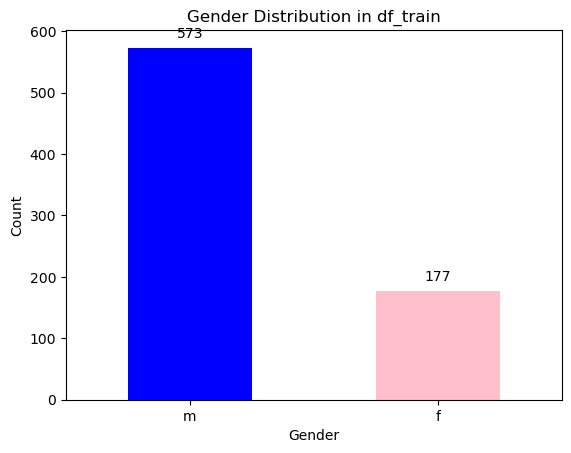

In [12]:
# Visualizing the distribution of genders in df_train using a bar plot with counts
gender_distribution = df_train['gender'].value_counts()
ax = gender_distribution.plot(kind='bar', color=['blue', 'pink'], title='Gender Distribution in df_train')

# Adding the count above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
#Numeric Visualizing and dividing the data into the two genders
m_samples = df_train[df_train['gender'] == 'm']
f_samples = df_train[df_train['gender'] == 'f']
print("number of male stories:",m_samples.shape[0])
print("number of female stories:",f_samples.shape[0])
print("--------------------------------------------------------------")
#Subtracting the samples from the Oversampled class
m_downsampled = m_samples.sample(len(f_samples))
print("After subtraction\nnumber of male stories:",m_downsampled.shape[0])
print("number of female stories:",f_samples.shape[0])
print("--------------------------------------------------------------")
# concat the two groups to one balanced dataFrame
print("concated DataFrame:")
df_train = pd.concat([m_downsampled, f_samples])
df_train
print("--------------------------------------------------------------")
# Shuffle the rows of the dataframe to ensure a random distribution of data
print("Shuffle rows of the dataframe:")
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

number of male stories: 573
number of female stories: 177
--------------------------------------------------------------
After subtraction
number of male stories: 177
number of female stories: 177
--------------------------------------------------------------
concated DataFrame:


,story,gender
8,עד לפני כמה חודשים אני הייתי בטוח שכל חיי אהיה...,m
228,"יום אחד קמתי בבוקר בשעה 7 ביקיצה טבעית, בתחילה...",m
55,ממש בתחילת הקורונה בישראל החלטתי כי אני מעוניי...,m
680,"בוקר אחד, בדרכי ללימודים במכללה, נסעתי באופניי...",m
635,"הכל התחיל בקיץ , זה היה חודש יולי אוגוסט חודשי...",m
...,...,...
737,"במהלך השנה רכשתי דירה שזקוקה לשיפוץ מסיבי, השי...",f
741,השנה עברתי את החוויה הכי גדולה וטהורה שיכולתי ...,f
743,גרתי במשך תקופה ארוכה עם 3 שותפים כאשר אני בקו...,f
745,אז רציתי לספר לכם חוויה שעברתי אני יודעת מראש ...,f


--------------------------------------------------------------
Shuffle rows of the dataframe:


,story,gender
0,"ביום שבת בבוקר במהלך חג השבועות, יום לפני מבחן...",f
1,בחודש אוגוסט בשיאו של הגל הרביעי של מחלת הקורו...,m
2,"במהלך הקורונה, היו מספר סגרים ומספר רב של הגבל...",f
3,בשירות הצבאי שלי עבדתי כמפתחת תוכנה. לקראת סוף...,f
4,"נסענו לצפון לראות שלג, יצאנו ב4.30 בבוקר, קבענ...",m
...,...,...
349,החוויה שלי היא שבשנה האחרונה הגשמתי משהו שממש ...,f
350,לפני כחודש וחצי ביום שבת בבוקר בשעה 7 וחצי דפק...,f
351,לפני כמה חודשים זכיתי לחגוג אליפות עם קבוצת הכ...,m
352,"כשהייתי בת 10, סיימתי בית ספר ואמא חיכתה לי בש...",f


### Preprocess: text manipulation

In [14]:
def text_preprocess(text):
    # Remove hours in the format H:MM or HH:MM
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)

    # Remove '!' and '!!'
    text = re.sub(r'!+', '', text)

    # Remove the '–' symbol
    text = re.sub(r'–', '', text)

    # Filter out letters that are not in Hebrew, final letters in Hebrew, English, the quotation mark, or newline
    text = re.sub(r'[^a-zA-Zא-תםןךףץ" \n]', '', text)

    # Split text into words
    words = text.split()
    
    # Removing words that has less than 3 letters - many of them are stop words
    words = [word for word in words if len(word) >= 3]

    # Join words with single space (should handle any remaining unnecessary spaces)
    return ' '.join(words)

# Apply preprocessing to train & test data frames.

In [15]:
df_train['story'] = df_train['story'].apply(text_preprocess)
df_test['story'] = df_test['story'].apply(text_preprocess)

# Tokenizer, Training models and classifiers

## Explanation of the `evaluate_classifiers` Function

This function is designed to evaluate various classifiers on text data using different feature extraction methods.

### Key Components:

1. **Vectorizers**
    - `tfidf_vectorizer`
    - `count_vectorizer`
2. **Classifiers**
3. **Parameter Grids**:
4. **Pipelines**:
    - Two pipelines are defined: one for the TF-IDF vectorizer and one for the count vectorizer. Each pipeline consists of a vectorizer step and a placeholder for the classifier.

5. **Evaluation**:
    - The function iterates over each pipeline and classifier combination. If a classifier requires hyperparameter tuning, it uses `GridSearchCV` to find the best parameters.
    - It then evaluates the classifier using 10-fold cross-validation and calculates the F1 score for both male and female classes. The average F1 score is stored in the results dictionary.

### Output:
The function returns a dictionary (`results`) containing the average F1 scores for each pipeline and classifier combination.


In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
def evaluate_classifiers(X, y):
    # Define the vectorizers
    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x,
                                       ngram_range=(1,3), min_df=0, max_df=300, max_features=8000)
    count_vectorizer = CountVectorizer(tokenizer=lambda x:x.split(' '), 
                                       ngram_range=(1,3), min_df=0, max_df=650, max_features=8000)

    # Define the classifiers
    classifiers = [
        ('LinearSVC', LinearSVC()),
        ('SGDClassifier', SGDClassifier(random_state=42)),
        ('MultinomialNB', MultinomialNB()),
        ('GaussianNB', GaussianNB()),
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
        ('KNeighbors', KNeighborsClassifier())
    ]
    
    # Parameters for GridSearchCV
    param_grids = {
        'DecisionTreeClassifier': {'max_depth': [2, 4, 6, 8, 10]},
        'KNeighbors': {'n_neighbors': [3, 5, 7]}
    }

    # Define the pipelines
    pipelines = [
        ('text_clf_tfidf', Pipeline([
            ('vect', tfidf_vectorizer),
            ('clf', None)  # Placeholder, will be replaced by each classifier
        ])),
        ('text_clf_count', Pipeline([
            ('vect', count_vectorizer),
            ('clf', None)  # Placeholder, will be replaced by each classifier
        ]))
    ]

    results = {}
    best_score = 0
    best_tokenizer = None
    best_classifier = None

    # Iterate over each pipeline and classifier combination
    for pipe_name, pipeline in pipelines:
        for clf_name, classifier in classifiers:
            # If classifier requires parameter tuning
            if clf_name in param_grids:
                grid_search = GridSearchCV(classifier, param_grids[clf_name], cv=10, scoring='f1_macro')
                grid_search.fit(pipeline.named_steps['vect'].fit_transform(X), y)
                best_classifier_temp = grid_search.best_estimator_
            else:
                best_classifier_temp = classifier

            pipeline.set_params(clf=best_classifier_temp)
            
            # Special handling for GaussianNB with sparse matrix from vectorizers
            if clf_name == 'GaussianNB':
                X_transformed = pipeline.named_steps['vect'].fit_transform(X).toarray()
                y_pred = cross_val_predict(best_classifier_temp, X_transformed, y, cv=10)
            else:
                y_pred = cross_val_predict(pipeline, X, y, cv=10)

            # Calculate f1 scores for male and female classes
            f1_male = f1_score(y, y_pred, pos_label='m')
            f1_female = f1_score(y, y_pred, pos_label='f')
            average_f1 = (f1_male + f1_female) / 2

            # Store the average F1 score
            key = f"{pipe_name} with {clf_name}"
            results[key] = average_f1

            # Update best scoring tokenizer and classifier
            if average_f1 > best_score:
                best_score = average_f1
                best_tokenizer = pipeline.named_steps['vect']
                best_classifier = best_classifier_temp

    return results, best_tokenizer, best_classifier


# Run Tokenizer, Training models process

In [35]:
X = df_train['story']
y = df_train['gender']
results, best_tokenizer, best_classifier = evaluate_classifiers(X, y)
results
print("--------------------------------------------------------------")
best_tokenizer
best_classifier

{'text_clf_tfidf with LinearSVC': 0.7145776621137252,
 'text_clf_tfidf with SGDClassifier': 0.6723059244126659,
 'text_clf_tfidf with MultinomialNB': 0.6777089189879888,
 'text_clf_tfidf with GaussianNB': 0.6610169491525424,
 'text_clf_tfidf with DecisionTreeClassifier': 0.5368537648390282,
 'text_clf_tfidf with KNeighbors': 0.6020059044768876,
 'text_clf_count with LinearSVC': 0.6807272669226041,
 'text_clf_count with SGDClassifier': 0.6323458920525358,
 'text_clf_count with MultinomialNB': 0.714303978521259,
 'text_clf_count with GaussianNB': 0.6666666666666666,
 'text_clf_count with DecisionTreeClassifier': 0.5244522629138013,
 'text_clf_count with KNeighbors': 0.3736392262708052}

--------------------------------------------------------------


TfidfVectorizer(max_df=300, max_features=8000, min_df=0, ngram_range=(1, 3),
                preprocessor=<function evaluate_classifiers.<locals>.<lambda> at 0x000002AC0E82BD90>,
                tokenizer=<function evaluate_classifiers.<locals>.<lambda> at 0x000002AC0E82BD00>)

LinearSVC()

In [19]:
# Transform the training data using the best tokenizer
X_train_transformed = best_tokenizer.transform(df_train['story'])
y_train = df_train['gender']

# If the best classifier is GaussianNB, convert the sparse matrix to a dense array
if isinstance(best_classifier, GaussianNB):
    X_train_transformed = X_train_transformed.toarray()

# Fit the best classifier on the transformed training data
best_classifier.fit(X_train_transformed, y_train)

# transform the test data using the best tokenizer
X_test_transformed = best_tokenizer.transform(df_test['story'])

# If the best classifier is GaussianNB, convert the sparse matrix to a dense array
if isinstance(best_classifier, GaussianNB):
    X_test_transformed = X_test_transformed.toarray()

# Predict using the best classifier
y_pred_test = best_classifier.predict(X_test_transformed)

# Add the predictions to the df_test dataframe
df_test['predicted_gender'] = y_pred_test

# Display the cleaned dataframe
df_test.head()
df_test.tail()

LinearSVC()

,test_example_id,story,predicted_gender
0,0,קיץ אני והמשפחה נוסעים לארצות הברית לוס אנגלס ...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,f
3,3,רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי אני ...,m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,f


,test_example_id,story,predicted_gender
318,318,בשנה האחרונה הרגשתי תקוע בעבודה השגרה הפכה למש...,m
319,319,אני ואילן חברים טובים מזה שנה תמיד חלמנו לפתח ...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,לפני מספר חודשים בשיא התחלואה הגל השני עמית של...,m
322,322,היום דיווחתי גניבה האוטו שלי בוקר אחד התעוררתי...,m


In [20]:
# df_test['story'][318]

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [21]:
df_predicted=df_test
df_predicted.to_csv('classification_results.csv',index=False)